In [1]:
# https://hub.arcgis.com/pages/a0db1c6905934fb5a522137f0fec6c7b
# https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

import geopandas as gpd
# folium

In [2]:
# bbbike -> shape files
# landuse.shp
# natural
# places
# points
# railways
# roads
# waterways
# buildings
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [3]:
print(unicamp_df.geometry.iloc[0])

POLYGON ((-47.063773 -22.8136798, -47.0637523 -22.8136705, -47.0636838 -22.8138006, -47.0640575 -22.8139678, -47.0641095 -22.8138691, -47.0640289 -22.813833, -47.0641053 -22.8136878, -47.0639184 -22.8136043, -47.0638586 -22.8137178, -47.0638184 -22.8136998, -47.063773 -22.8136798))


In [4]:
unicamp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

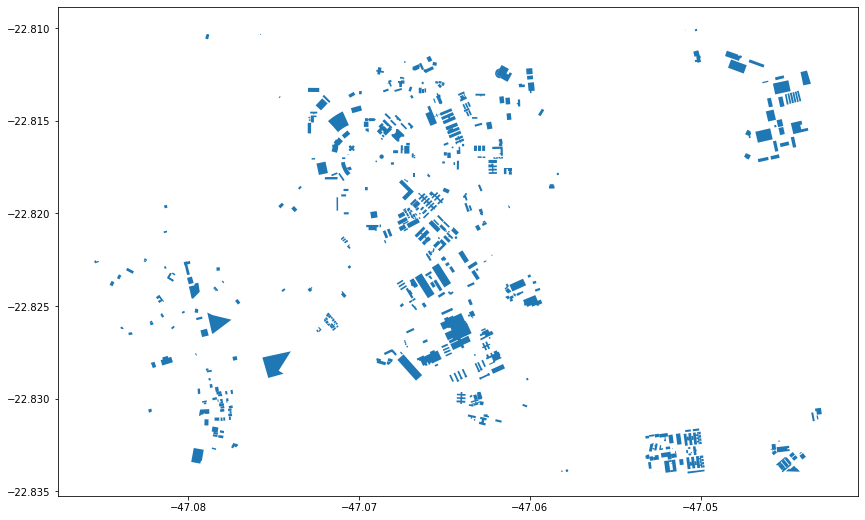

In [5]:
ax = unicamp_df.plot(figsize=(17, 9))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


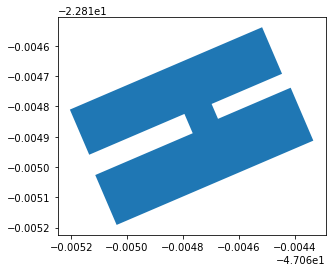

In [6]:
melb = unicamp_df.query('osm_id == 95011169')
ax = melb.plot()
melb.head()


/home/wasp/anaconda3/envs/coleta_residuos/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-5239274.655 -2593076.664, -5239198...."


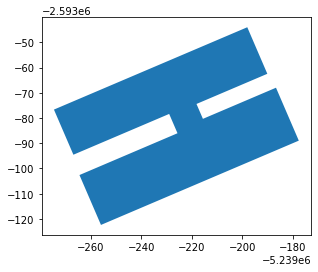

In [7]:
# mercator
cpr_gdf= unicamp_df.to_crs({'init': 'EPSG:3395'})  
melb = cpr_gdf.query('osm_id == 95011169')
ax = melb.plot()
melb.head()

POLYGON ((-5239115.245170217 -2592940.890127046, -5239112.940856758 -2592939.773388546, -5239105.315471639 -2592955.395726621, -5239146.915565348 -2592975.473034916, -5239152.70417887 -2592963.62117587, -5239143.731827911 -2592959.286303555, -5239152.236637008 -2592941.850762377, -5239131.431024179 -2592931.82413392, -5239124.774118629 -2592945.453145377, -5239120.2990751 -2592943.291715481, -5239115.245170217 -2592940.890127046))


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-5239115.245 -2592940.890, -5239112...."
1,95011157,Banco Santander,bank,"POLYGON ((-5239675.049 -2593326.446, -5239676...."
2,95011161,Ciclo Básico II,university,"POLYGON ((-5239885.598 -2593456.267, -5239864...."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-5239274.655 -2593076.664, -5239198...."
4,95011172,IC 3.5,university,"POLYGON ((-5239164.816 -2592927.033, -5239159...."


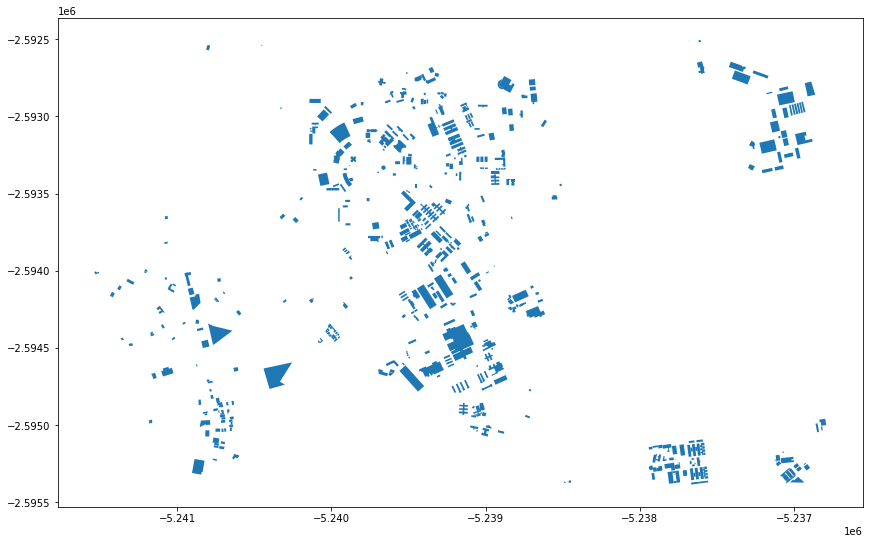

In [8]:
ax = cpr_gdf.plot(figsize=(17, 9))
print(cpr_gdf.geometry.iloc[0])
cpr_gdf.head()

In [9]:
# https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
# https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139
import pyproj

myProj = pyproj.Proj('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
print 
myProj = pyproj.Proj('+proj=utm +zone=23 +south +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
# myProj = pyproj.Proj(proj='utm', zone=23, ellps='WGS84', datum='WGS84', preserve_units=True)

lon, lat = myProj(-47.063773 ,-22.8136798, inverse=False)
lon,lat

(288.17997032699867, 7475.6259999355525)

In [11]:
import pandas as pd
import numpy as np

x = (-22.8136798, -22.8136705, -22.8138006, -22.8139678, -22.8138691, -22.813833, -22.8136878, -22.8136043, -22.8137178, -22.8136998, -22.8136798 )    
y = (-47.063773, -47.0637523, -47.0636838, -47.0640575, -47.0641095, -47.0640289, -47.0641053, -47.0639184, -47.0638586, -47.0638184, -47.063773 )


df = pd.DataFrame(np.c_[x, y], columns=['lat', 'lng'])
lng, lat = myProj(df['lng'].values, df['lat'].values, inverse=False)

lng, lat

(array([288.17997033, 288.18208117, 288.18931528, 288.15120684,
        288.14571533, 288.15393454, 288.14586595, 288.16492549,
        288.1712407 , 288.17534012, 288.17997033]),
 array([7475.62599994, 7475.62705958, 7475.61274957, 7475.59369645,
        7475.60455264, 7475.60866627, 7475.62463723, 7475.6341528 ,
        7475.62166873, 7475.62371985, 7475.62599994]))